In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [17]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('bank-full.csv', sep=';', quoting=3)
data.head()

,"""age""","""job""","""marital""","""education""","""default""","""balance""","""housing""","""loan""","""contact""","""day""","""month""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""y"""
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [4]:
data.tail()

,"""age""","""job""","""marital""","""education""","""default""","""balance""","""housing""","""loan""","""contact""","""day""","""month""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""y"""
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""
45210,37,"""entrepreneur""","""married""","""secondary""","""no""",2971,"""no""","""no""","""cellular""",17,"""nov""",361,2,188,11,"""other""","""no"""


In [5]:
data.columns

Index(['"age"', '"job"', '"marital"', '"education"', '"default"', '"balance"',
       '"housing"', '"loan"', '"contact"', '"day"', '"month"', '"duration"',
       '"campaign"', '"pdays"', '"previous"', '"poutcome"', '"y"'],
      dtype='object')

In [6]:
data.shape

(45211, 17)

In [7]:
data.size

768587

In [8]:
data.describe()

,"""age""","""balance""","""day""","""duration""","""campaign""","""pdays""","""previous"""
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
data.isna().sum()

"age"          0
"job"          0
"marital"      0
"education"    0
"default"      0
"balance"      0
"housing"      0
"loan"         0
"contact"      0
"day"          0
"month"        0
"duration"     0
"campaign"     0
"pdays"        0
"previous"     0
"poutcome"     0
"y"            0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   "age"        45211 non-null  int64 
 1   "job"        45211 non-null  object
 2   "marital"    45211 non-null  object
 3   "education"  45211 non-null  object
 4   "default"    45211 non-null  object
 5   "balance"    45211 non-null  int64 
 6   "housing"    45211 non-null  object
 7   "loan"       45211 non-null  object
 8   "contact"    45211 non-null  object
 9   "day"        45211 non-null  int64 
 10  "month"      45211 non-null  object
 11  "duration"   45211 non-null  int64 
 12  "campaign"   45211 non-null  int64 
 13  "pdays"      45211 non-null  int64 
 14  "previous"   45211 non-null  int64 
 15  "poutcome"   45211 non-null  object
 16  "y"          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [55]:
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome','y']
target = '"y"'

In [57]:
X = data
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,"""age""","""job""","""marital""","""education""","""default""","""balance""","""housing""","""loan""","""contact""","""day""","""month""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""y"""
10747,36,9,2,2,0,0,0,0,2,17,6,153,4,-1,0,3,0
26054,56,2,1,1,0,196,0,0,0,19,9,312,3,-1,0,3,0
9125,46,1,1,1,0,0,1,0,2,5,6,83,2,-1,0,3,0
41659,41,4,0,2,0,3426,0,0,0,1,10,302,1,119,5,2,0
4443,38,1,1,1,0,0,1,0,2,20,8,90,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,3,2,0,0,1059,0,0,2,18,6,2093,1,-1,0,3,1
44732,23,8,2,2,0,508,0,0,0,8,11,210,1,92,1,0,0
38158,34,9,0,2,0,1317,1,0,0,15,8,239,1,-1,0,3,0
860,33,5,1,1,0,165,0,0,2,7,8,111,1,-1,0,3,0


In [60]:
categorical_features = [feature.replace('"', '') for feature in categorical_features]
X_train.columns = X_train.columns.str.replace('"', '')
print(X_train.columns)
print(categorical_features)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [61]:
from sklearn.preprocessing import LabelEncoder

# Remove quotation marks from column names
X_train.columns = X_train.columns.str.replace('"', '')
X_test.columns = X_test.columns.str.replace('"', '')
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    X_train[feature] = label_encoders[feature].fit_transform(X_train[feature])

for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    X_train[feature] = label_encoders[feature].fit_transform(X_train[feature])
    X_test[feature] = label_encoders[feature].transform(X_test[feature])

# Define column transformer
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(drop='first'), categorical_features)],
    remainder='passthrough'
)

# Fit and transform the data
X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

In [62]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train_encoded, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [63]:
# Predict using the test set
y_pred = clf.predict(X_test_encoded)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [65]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[11966     0]
 [    0  1598]]


In [66]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11966
           1       1.00      1.00      1.00      1598

    accuracy                           1.00     13564
   macro avg       1.00      1.00      1.00     13564
weighted avg       1.00      1.00      1.00     13564



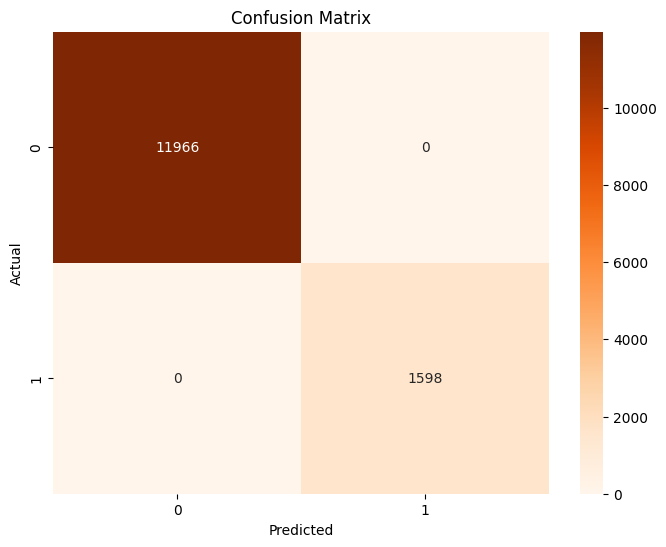

In [67]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Oranges")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [68]:
tree_structure = export_text(clf, feature_names=ct.get_feature_names_out())
print("Decision Tree Structure:")
print(tree_structure)

Decision Tree Structure:
|--- one_hot_encoder__y_1 <= 0.50
|   |--- class: 0
|--- one_hot_encoder__y_1 >  0.50
|   |--- class: 1

